In [1]:
#import all modules needed
import matplotlib.pyplot as plt
import math
import random

In [2]:
#initialization function
def initialize():
    # initialize to 0 
    population = [[0,0]]
    for i in range(1000):
        population.append(mutate(population[0]))
    return population

In [3]:
#mutation function
def mutate(indival):
    newmutate = []
    for value in indival:
        newmutate.append(value + random.normalvariate(0, value + .1))  
    return newmutate


In [4]:
#function with given formula used to check the fitness
def fitness_function(x, y):
    #function  
    value = ( ((1 -x)**2)*((math.e)**((-x**2) - (y+1)**2))) -  \
            ( ( x - x **3 - y**3 )*((math.e) ** ((-x**2) - y**2)))   
    return value


In [5]:
#evaluvate the generation
def evaluate_gene(population):
    scores = []
    total = 0
    for indiv in population:
        r = fitness_function(indiv[0], indiv[1])
        scores.append(r)
        total += r
    #average of all the scores
    avg = total / len(scores)
    return scores, avg


In [6]:
#function to find  best in the population
def bestfun(population):
    best = None
    val = None
    for indiv in population:
        value = fitness_function(indiv[0], indiv[1])
        try:
            if value > val:
                best = indiv
                val = value
        except:
                best = indiv
                val = value
    return best, val


Runing 100 iteration 

Calculating Best

best values 
 X =  -0.6272187996904799 
 Y =  -0.8301293549545197 
 Value =  1.6709 



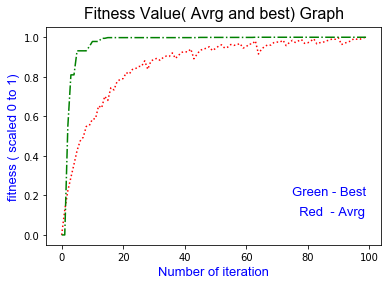

In [7]:

#Startexecution function

def Startexecution():
    population = initialize()
    avrscore = [] 
    avrsbest = []
    scoresnrms = []
    best_averagesnorm = [] 
    print("Runing 100 iteration \n")
     # arragnge the plot 
    axis_font = {'fontname':'Arial', 'size':'13','color':'blue'}
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal','verticalalignment':'bottom'}
    plt.title("Fitness Value( Avrg and best) Graph", **title_font)
    plt.xlabel('Number of iteration',**axis_font)
    plt.ylabel('fitness ( scaled 0 to 1)',**axis_font)
    plt.text(75,0.1,'  Red  - Avrg',**axis_font)
    plt.text(75,0.2,'Green - Best',**axis_font)
    
    for iteration in range(100):
        scores, avg = evaluate_gene(population)
        deleted = 0
        new_population = []
        for i in range(len(population)):
            if scores[i] < avg:
                deleted += 1
            else: 
                new_population.append(population[i])
        for i in range(deleted):
            new_population.append(mutate(new_population[i % len(new_population)]))
        population = new_population
        best, Bval = bestfun(population)
        avrscore.append(avg)
        avrsbest.append(Bval)
    #scaling the values
    for value in avrscore:
        scoresnrms.append ( ( value - min(avrscore) ) / (max(avrscore) - min(avrscore)))     
    for avrval in avrsbest:
        best_averagesnorm.append((avrval - min(avrsbest)) / (max(avrsbest) - min(avrsbest)))
    
    print("Calculating Best\n")
    best, val = bestfun(population)
    print("best values \n X = ", best[0], "\n" ,"Y = ", best[1], "\n", "Value = ", round(val, 4),"\n")
    #Set Data to the plot
    plt.plot(scoresnrms ,  color='red',linestyle = 'dotted')
    plt.plot(best_averagesnorm , color = 'green',linestyle = 'dashdot')  
    
#call the main function    
Startexecution() 